In [2]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import json
import pydicom

In [3]:
#from matplotlib.font_manager import fontManager, FontProperties
#path = "/home/getznerj/Downloads/Palatino Font Free/Palatino.ttf"
#fontManager.addfont(path)
#prop = FontProperties(fname=path)
#plt.rcParams['font.family'] = prop.get_name()

In [4]:
# load json file subsets.json
with open('./subsets.json') as f:
    subsets = json.load(f)
# del "test/AUROC" key value pair
del subsets["test/AUROC"]

In [5]:
k = 5

In [6]:
os.getcwd()

'/home/getznerj/PycharmProjects/thesis/src_refactored'

In [7]:
male_subset = [value for key, value in subsets.items() if "male" in key][0]
female_subset = [value for key, value in subsets.items() if "female" in key][0]
old_subset = [value for key, value in subsets.items() if "old" in key][0]
young_subset = [value for key, value in subsets.items() if "young" in key][0]

['../src/datasets/RSNA/stage_2_train_images/6789e4a8-92e1-47df-8b10-d979da39489a.dcm', '../src/datasets/RSNA/stage_2_train_images/cfe9db74-671b-46a9-8489-c8f3c76e30a5.dcm', '../src/datasets/RSNA/stage_2_train_images/07f1ae3f-2482-4c76-8801-bc4895b3f46e.dcm', '../src/datasets/RSNA/stage_2_train_images/e6b8b863-a0ce-48d8-8de2-9c72ba210f3b.dcm', '../src/datasets/RSNA/stage_2_train_images/db754689-fb19-40ce-87dd-e790b3dd2c44.dcm']
['../src/datasets/RSNA/stage_2_train_images/9d4fab12-d3fa-49ea-8285-82b70452b529.dcm', '../src/datasets/RSNA/stage_2_train_images/cc7a7a1f-6953-4341-b6fd-5380a642bb1e.dcm', '../src/datasets/RSNA/stage_2_train_images/514d710f-123b-4fcc-b8e0-e1d389ff55c1.dcm', '../src/datasets/RSNA/stage_2_train_images/5e9ab5d7-c02b-40c1-9b43-bfa862722f82.dcm', '../src/datasets/RSNA/stage_2_train_images/5d9a3bee-f9c3-4107-b021-f9f99eb55a4a.dcm']


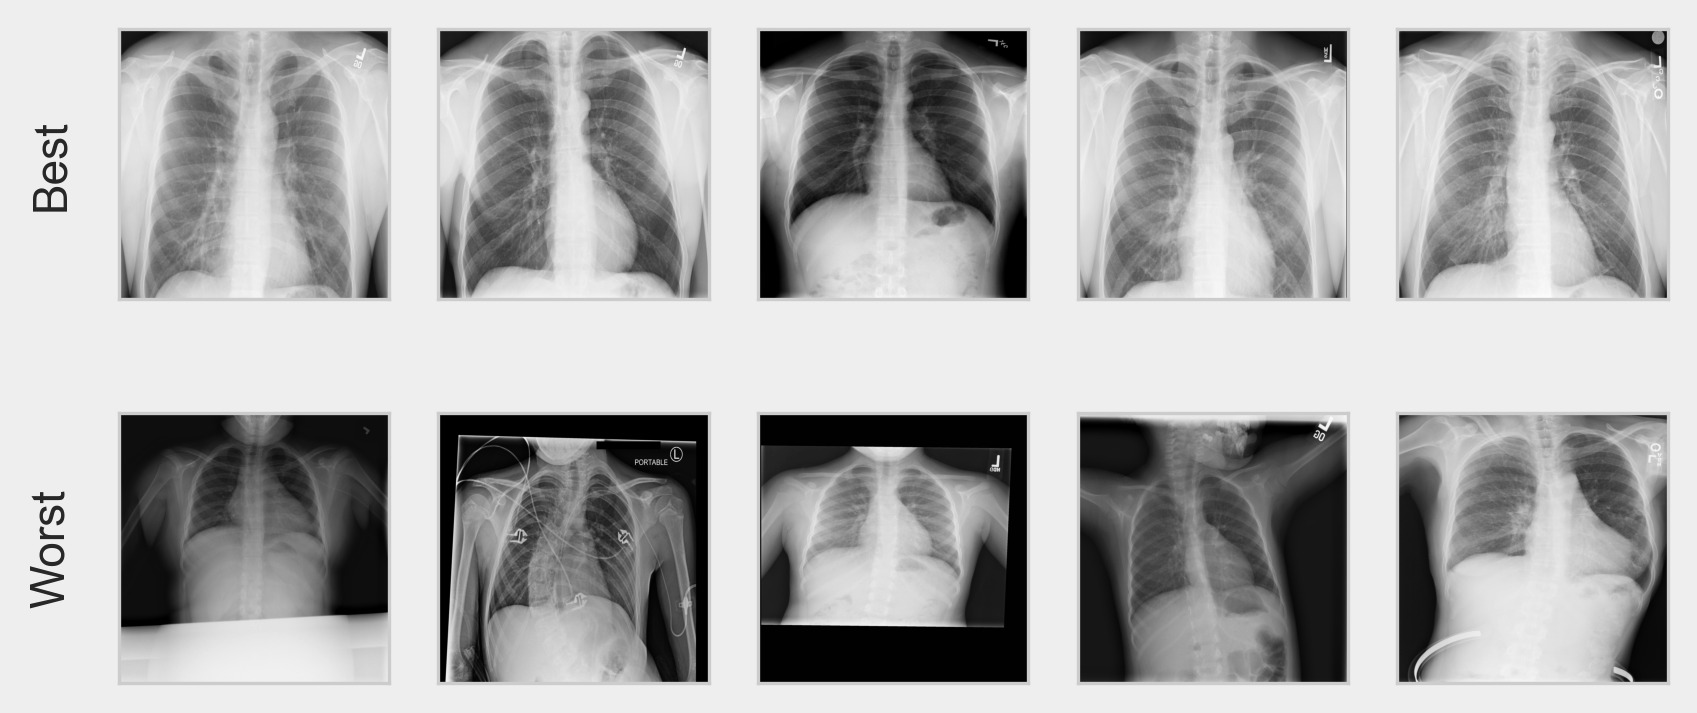

In [13]:
fontSize = 11
rc={"figure.dpi": 300, 'savefig.dpi': 300, 'axes.labelsize': fontSize, 'axes.titlesize': fontSize, 'font.size': fontSize, 'legend.fontsize': fontSize*0.7, 'axes.facecolor':'#EEEEEE', 'figure.facecolor':'#EEEEEE'}
plt.rcParams.update(rc)
fig, axs = plt.subplots(2, k, figsize=(5.78853, 3))
for row, subset in enumerate([young_subset,young_subset]):
    top_k_filenames = subset["filenames"][:k]
    top_k_filenames = [f[2:] for f in top_k_filenames]
    #top_k_scores = subset["scores"][:k]
    if row == 1:
        #top_k_filenames = subset["filenames"][::-1][:k]
        #top_k_scores = subset["scores"][::-1][:k]
        top_k_filenames = [
        'datasets/RSNA/stage_2_train_images/9d4fab12-d3fa-49ea-8285-82b70452b529.dcm',
        'datasets/RSNA/stage_2_train_images/cc7a7a1f-6953-4341-b6fd-5380a642bb1e.dcm',
        'datasets/RSNA/stage_2_train_images/514d710f-123b-4fcc-b8e0-e1d389ff55c1.dcm',
        'datasets/RSNA/stage_2_train_images/5e9ab5d7-c02b-40c1-9b43-bfa862722f82.dcm',
        'datasets/RSNA/stage_2_train_images/5d9a3bee-f9c3-4107-b021-f9f99eb55a4a.dcm']
    top_k_filenames = [os.path.join("../src/",f) for f in top_k_filenames]
    print(top_k_filenames)
    for i, f in enumerate(top_k_filenames):
        ds = pydicom.dcmread(f)
        axs[row,i].imshow(ds.pixel_array, cmap=plt.cm.gray)
        axs[row,i].grid(False)
        axs[row,i].set_xticklabels([])
        axs[row,i].set_yticklabels([])
# add y axis label
axs[0,0].set_ylabel("Best")
axs[1,0].set_ylabel("Worst")
plt.tight_layout()
plt.show()

In [ ]:
# save figure
fig.savefig("../plots/core-set-selection/best_and_worst.png", dpi=300, bbox_inches='tight')

In [ ]:
rc={"figure.dpi": 300, 'savefig.dpi': 300, 'axes.labelsize': 11, 'axes.titlesize': 9, 'font.size': fontSize, 'legend.fontsize': fontSize*0.7}
plt.rcParams.update(rc)
for idx, subset_set in enumerate([(old_subset, young_subset),(male_subset,female_subset)]):
    fig, axs = plt.subplots(k, 2, figsize=(3,5.78853))
    for i, subset in enumerate(subset_set):
        top_k_filenames = subset["filenames"][:k]
        top_k_filenames = [f[2:] for f in top_k_filenames]
        top_k_scores = subset["scores"][:k]
        top_k_filenames = [os.path.join("../src/",f) for f in top_k_filenames]
        for row, f in enumerate(top_k_filenames):
            ds = pydicom.dcmread(f)
            axs[row,i].imshow(ds.pixel_array, cmap=plt.cm.bone)
            axs[row,i].grid(False)
            axs[row,i].set_xticklabels([])
            axs[row,i].set_yticklabels([])
            #axs[row,i].set_title(f"s-AUC: {top_k_scores[i]*100:.0f}")
    if idx == 0:
        # set y axis label
        axs[0,0].set_ylabel("Old")
        axs[1,0].set_ylabel("Young")
    else:
        axs[0,0].set_ylabel("Male")
        axs[1,0].set_ylabel("Female")
    plt.tight_layout()
    plt.savefig(f"../plots/core-set-selection/best_{'age' if idx==0 else 'sex'}.png", dpi=300, bbox_inches='tight')
    plt.show()